## Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## Loading the dataset

In [ ]:

data = pd.read_csv('OnlineRetail.csv', encoding='latin1')


## EDA

In [ ]:
# Check for null values in each column
null_counts = data.isnull().sum()
print("Number of null values in each column:")
print(null_counts)



Number of null values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Drop any rows with missing values
data = data.dropna()

In [ ]:
null_counts = data.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Clearly, outliers are there in the data.

## Handling Outliers

In [ ]:
# Handling Outliers

lower_bound = data['Quantity'].quantile(0.01)
upper_bound = data['Quantity'].quantile(0.99)
data['Quantity'] = data['Quantity'].clip(lower=lower_bound, upper=upper_bound)

lower_bound = data['UnitPrice'].quantile(0.01)
upper_bound = data['UnitPrice'].quantile(0.99)
data['UnitPrice'] = data['UnitPrice'].clip(lower=lower_bound, upper=upper_bound)


## Adding Recency Column

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
recency_df = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
max_date = recency_df['InvoiceDate'].max()

In [ ]:
recency_df['Recency'] = (max_date - recency_df['InvoiceDate']).dt.days

In [ ]:

data = pd.merge(data, recency_df[['CustomerID', 'Recency']], on='CustomerID')

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301


## Feature Extraction and Model fitting

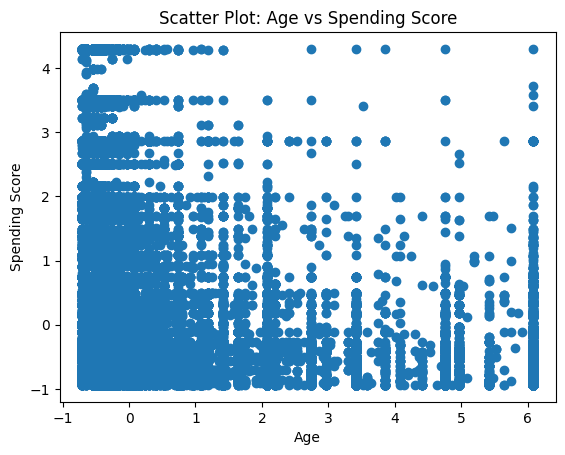

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

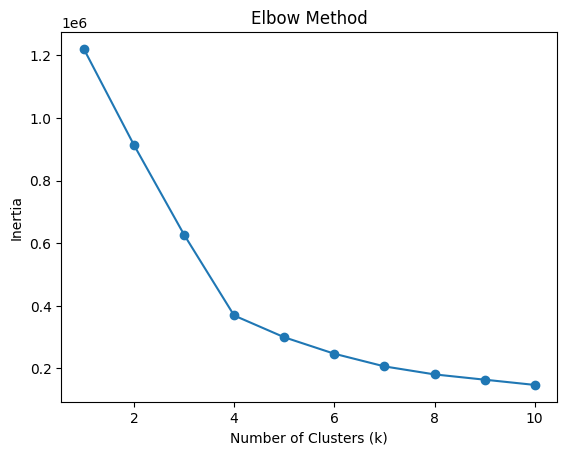

In [ ]:
# Extract features
features = ['Quantity',		'UnitPrice'	,	'Recency']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scatter plot: Age vs Spending Score
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Scatter Plot: Quantity vs UnitPrice')
plt.show()

# Find the optimal number of clusters using the elbow method
inertias = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


### Applying K-Means Optimal

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


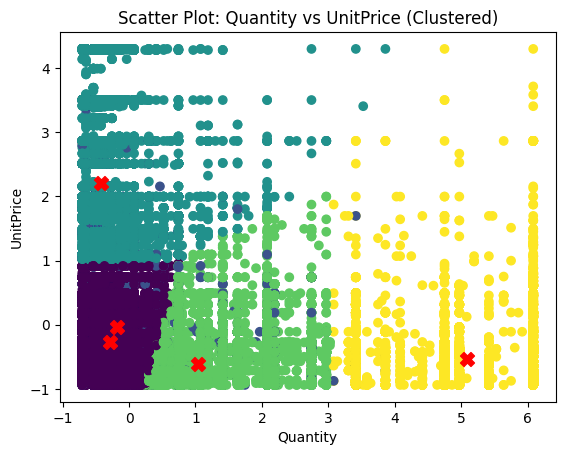

In [ ]:


k_optimal = 5 # inertia seems slowly decrreasing after 5

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=0)
kmeans.fit(X_scaled)

# Scatter plot: Quantity vs UnitPrice (Clustered)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, c='red')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Scatter Plot: Quantity vs UnitPrice (Clustered)')
plt.show()
